# Problem Description

The brief carefully it states that the client wanted to see “An analysis of their content categories showing the top 5 categories with the largest popularity”.

# Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn

# Loading Data

In [7]:
df_reaction = pd.read_csv('Reactions.csv')
df_reaction_type = pd.read_csv('ReactionTypes.csv')
df_content = pd.read_csv('Content.csv')

# Exploratory Data Analysis

In [8]:
df_content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [9]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


### Check if there are nulls

In [10]:
null_counts = pd.isnull(df_content).sum()
null_counts

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

### The following columns are not relevant for the analysis, so

In [ ]:
df_content.drop('User ID', axis=1, inplace=True)
df_content.drop('URL', axis=1, inplace=True)
df_content.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df_reaction.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [17]:
df_reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


### The following columns are also not relevant for the analysis, so

In [ ]:
df_reaction.drop('User ID', axis=1, inplace=True)
df_reaction.drop('Unnamed: 0', axis=1, inplace=True)
df_reaction.dropna(inplace=True)

### We can see that the 'DATE' column is in an integer format. Let's change this to a date format.

In [ ]:
df_reaction['Datetime'] = pd.to_datetime(df_reaction['Datetime'])

In [24]:
df_reaction_type.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [22]:
df_reaction_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [ ]:
df_reaction_type.drop('Unnamed: 0', axis=1, inplace=True)

### Now, let's merge reaction data to content data

In [27]:
df_combined = df_reaction.merge(df_content, how='left', on='Content ID')
df_combined

,Content ID,Type_x,Datetime,Type_y,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [29]:
null_counts = pd.isnull(df_combined).sum()
null_counts

Content ID    0
Type_x        0
Datetime      0
Type_y        0
Category      0
dtype: int64

In [30]:
df_combined.rename(columns={'Type_x': 'Type'}, inplace=True)
df_combined.rename(columns={'Type_y': 'Type Content'}, inplace=True)

### Finally, let's merge this dataframe with reaction type data 

In [32]:
df_final = df_combined.merge(df_reaction_type, how='left', on='Type')
df_final.head()

,Content ID,Type,Datetime,Type Content,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Content ID    24573 non-null  object        
 1   Type          24573 non-null  object        
 2   Datetime      24573 non-null  datetime64[ns]
 3   Type Content  24573 non-null  object        
 4   Category      24573 non-null  object        
 5   Sentiment     24573 non-null  object        
 6   Score         24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [34]:
df_final.rename(columns={'Type': 'Reaction_Type', 'Type Content': 'Content_Type'}, inplace=True)
df_final

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


### Now, we can see the top categories by score

In [36]:
tot_score_by_category = df_final.groupby('Category')['Score'].sum().reset_index()
tot_score_by_category.sort_values('Score', ascending=False, inplace = True)
tot_score_by_category

,Category,Score
24,animals,69548
31,healthy eating,69067
36,technology,67472
33,science,66043
25,cooking,63982
38,travel,63788
30,food,63122
26,culture,62915
28,education,56041
34,soccer,52684


In [37]:
tot_score_by_category.to_csv('most_popular_categories.csv', index=False)

### Top 5 categories by score:

In [39]:
top_five_category = tot_score_by_category.head(5)

Text(0.5, 1.0, 'Top 5 Categories by Agregate "Popularity" Score')

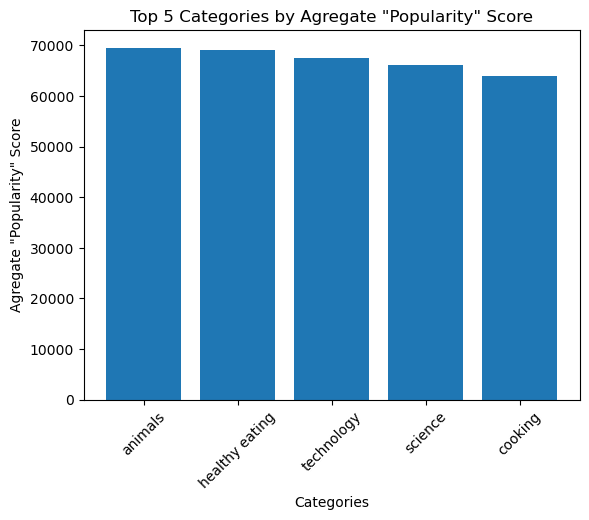

In [45]:
plt.bar(top_five_category.Category, top_five_category.Score)
plt.xticks(rotation=45)
plt.ylabel('Agregate "Popularity" Score')
plt.xlabel('Categories')
plt.title('Top 5 Categories by Agregate "Popularity" Score')

Text(0.5, 1.0, 'Popularity Percentage Share From Top 5 Categories')

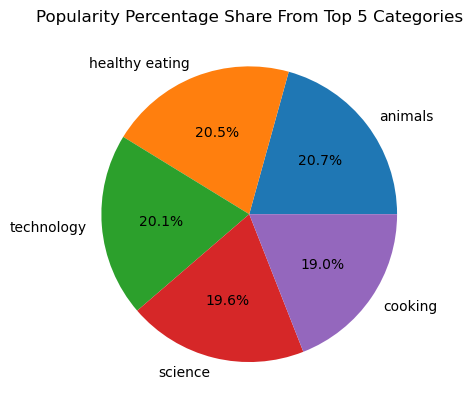

In [46]:
plt.pie(top_five_category.Score, labels=top_five_category.Category, autopct='%1.1f%%')
plt.title('Popularity Percentage Share From Top 5 Categories')

### How many reactions are there to the most popular category?

In [42]:
df_combined['Category'].value_counts()

animals              1765
healthy eating       1711
technology           1667
science              1662
cooking              1640
travel               1618
food                 1606
culture              1586
education            1397
soccer               1334
tennis               1328
studying             1303
dogs                 1283
fitness              1257
veganism             1200
public speaking      1157
Fitness               138
Science               116
Animals                92
Food                   91
Soccer                 65
"soccer"               58
"dogs"                 55
"culture"              49
Studying               45
Culture                41
"animals"              40
"veganism"             37
Education              36
Public Speaking        32
Travel                 29
"public speaking"      28
"technology"           28
"cooking"              24
"science"              18
"studying"             15
Veganism               11
Healthy Eating          6
Technology  

### What was the month with most posts? 

Text(0.5, 1.0, 'Number of Reactions by Month')

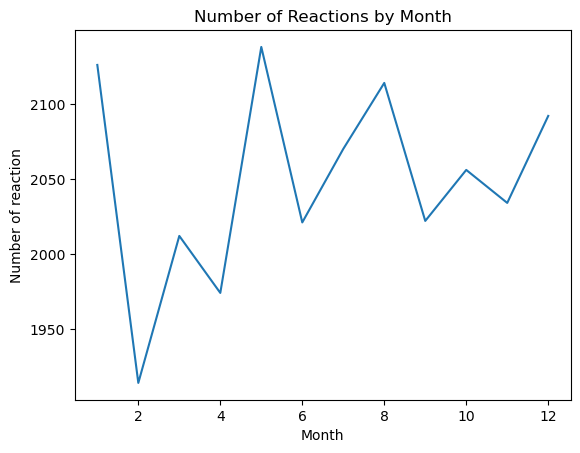

In [48]:
months = df_combined['Datetime'].dt.month
posts_by_month = months.value_counts()
posts_by_month.sort_index()

srn.lineplot(x=posts_by_month.index, y=posts_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of reaction')
plt.title('Number of Reactions by Month')

In [49]:
posts_by_month

5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: Datetime, dtype: int64